In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dropout, BatchNormalization



batch_size = 32
img_height = 224
img_width = 224
dataset_dir = "/content/drive/MyDrive/Automating Port Operations_Dataset/boat_type_classification_dataset"


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=43
)


validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=43
)


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 942 images belonging to 9 classes.
Found 230 images belonging to 9 classes.
Found 1172 images belonging to 9 classes.


In [ ]:
from keras import models, layers

model = models.Sequential([
  layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',input_shape=(224,224,3)),
  layers.MaxPool2D(),
  layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.GlobalAveragePooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,041 (125.16 KB)

 Trainable params: 32,041 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',"precision","recall"])

In [ ]:
history=model.fit(train_generator,validation_data=validation_generator,epochs = 20)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 184s 5s/step - accuracy: 0.2456 - loss: 2.0356 - precision: 0.3635 - recall: 0.0050 - val_accuracy: 0.3348 - val_loss: 1.8039 - val_precision: 1.0000 - val_recall: 0.0130
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.3216 - loss: 1.8334 - precision: 0.8732 - recall: 0.0142 - val_accuracy: 0.3348 - val_loss: 1.7882 - val_precision: 1.0000 - val_recall: 0.0130
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.3210 - loss: 1.8073 - precision: 0.9587 - recall: 0.0084 - val_accuracy: 0.3348 - val_loss: 1.7781 - val_precision: 0.9167 - val_recall: 0.0478
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.3238 - loss: 1.7847 - precision: 0.3785 - recall: 0.0086 - val_accuracy: 0.3435 - val_loss: 1.7416 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.3528 - loss: 1.7694 - precision: 0.5659 - recall: 0.0150 - val_accuracy: 0.3391 - val_loss: 1.

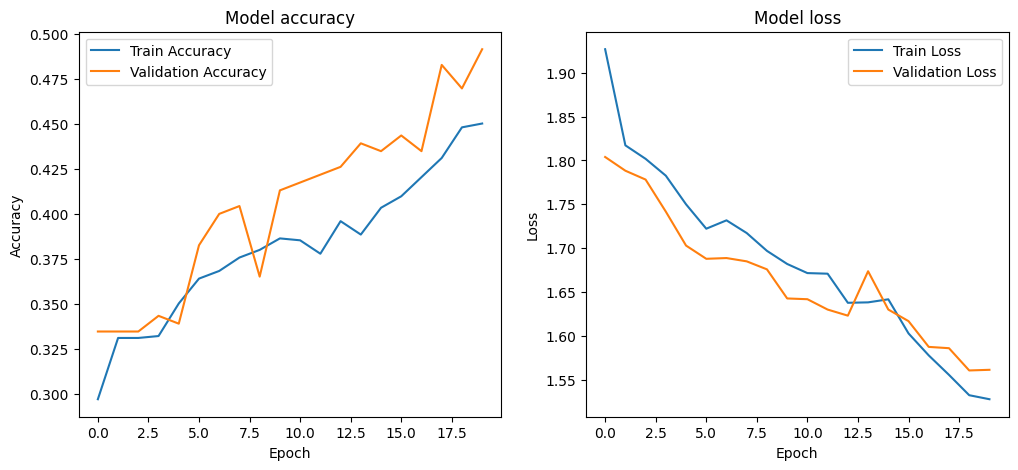

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
test_metrics = model.evaluate(test_generator)
test_loss = test_metrics[0]
test_accuracy = test_metrics[1]
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 35s 926ms/step - accuracy: 0.2231 - loss: 1.8552 - precision: 0.3974 - recall: 0.0650
Test Loss: 1.514862060546875
Test Accuracy: 0.46501705050468445


37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step


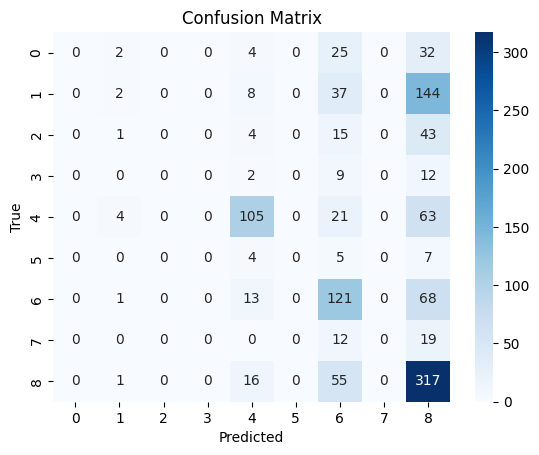

                 precision    recall  f1-score   support

           buoy       0.00      0.00      0.00        63
    cruise_ship       0.18      0.01      0.02       191
     ferry_boat       0.00      0.00      0.00        63
   freight_boat       0.00      0.00      0.00        23
        gondola       0.67      0.54      0.60       193
inflatable_boat       0.00      0.00      0.00        16
          kayak       0.40      0.60      0.48       203
     paper_boat       0.00      0.00      0.00        31
       sailboat       0.45      0.81      0.58       389

       accuracy                           0.47      1172
      macro avg       0.19      0.22      0.19      1172
   weighted avg       0.36      0.47      0.38      1172



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np


test_generator.reset()
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_test = test_generator.classes


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_test, y_pred, target_names=test_generator.class_indices.keys()))

In [ ]:
from keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(9, activation='softmax'))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.optimizers import Adam
from keras.metrics import Precision, Recall

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator, validation_data=validation_generator,epochs=50,
    callbacks=[early_stopping])

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 315s 8s/step - accuracy: 0.4237 - loss: 1.8337 - precision_2: 0.5698 - recall_2: 0.3199 - val_accuracy: 0.4391 - val_loss: 1.6470 - val_precision_2: 0.5064 - val_recall_2: 0.3435
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 237s 8s/step - accuracy: 0.8158 - loss: 0.6329 - precision_2: 0.8756 - recall_2: 0.7217 - val_accuracy: 0.5870 - val_loss: 2.0300 - val_precision_2: 0.6165 - val_recall_2: 0.5522
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 262s 8s/step - accuracy: 0.9065 - loss: 0.3488 - precision_2: 0.9312 - recall_2: 0.8697 - val_accuracy: 0.6304 - val_loss: 1.6364 - val_precision_2: 0.6618 - val_recall_2: 0.5870
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 254s 8s/step - accuracy: 0.9334 - loss: 0.2421 - precision_2: 0.9531 - recall_2: 0.9035 - val_accuracy: 0.6261 - val_loss: 2.1151 - val_precision_2: 0.6620 - val_recall_2: 0.6217
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 267s 8s/step - accuracy: 0.9423 - loss: 0.1987 - precision_2: 0.9489 - recall_2: 0.9322 - val_

In [ ]:
test_metrics = model.evaluate(test_generator)
test_loss = test_metrics[0]
test_accuracy = test_metrics[1]
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5859 - loss: 1.7707 - precision_2: 0.6162 - recall_2: 0.5413
Test Loss: 1.3601312637329102
Test Accuracy: 0.6885665655136108


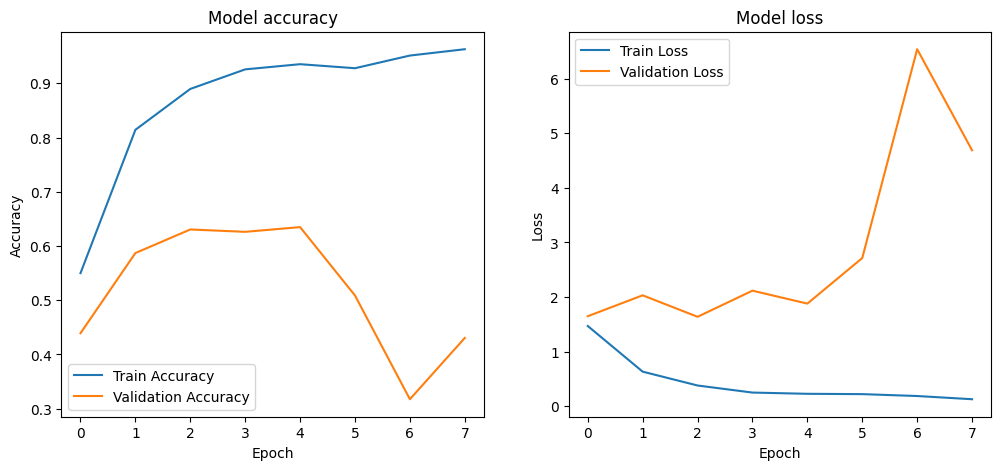

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()